In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

**Data Visualization**

In [ ]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
y_train=train_data['label']
y_train.head()


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [ ]:
print(y_train.shape)

(27455,)


In [ ]:
trainset = train_data.drop(['label'],axis=1)

trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [ ]:
x_train = X_train.reshape(-1 ,28*28*1)

In [ ]:
print(x_train.shape)

(27455, 784)


In [ ]:
y_test=test_data['label']
y_test.head()

0     6
1     5
2    10
3     0
4     3
Name: label, dtype: int64

In [ ]:
print(y_test.shape)

(7172,)


In [ ]:

testset = test_data.drop(['label'],axis=1)
testset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
X_test = testset
print(X_test.shape)


(7172, 784)


In [ ]:
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


**Visualising our dataset using matplotlib**

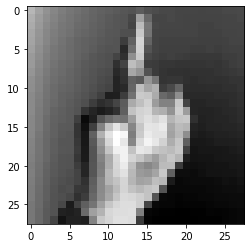

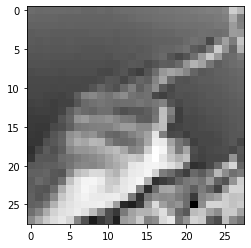

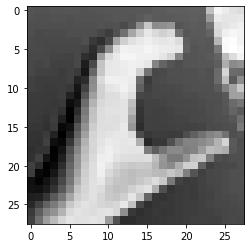

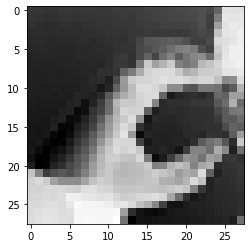

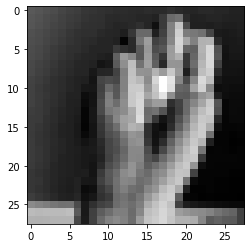

In [ ]:
for i in range(5):
  image0 = trainset.iloc[i,:]                                                
  plt.imshow(np.array(image0).reshape(28,  28), cmap = 'Greys')
  plt.show()

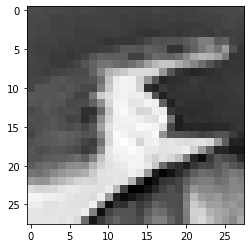

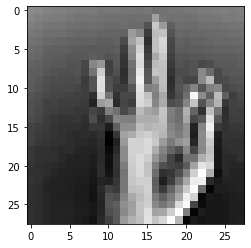

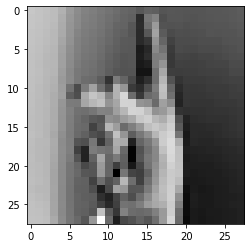

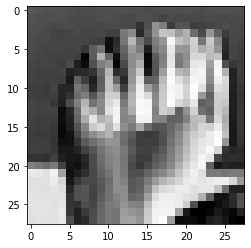

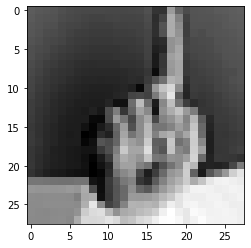

In [ ]:
for i in range(5):
  image0 = testset.iloc[i,:]                                                
  plt.imshow(np.array(image0).reshape(28,  28), cmap = 'Greys')
  plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test set:', acc)
print('F1 Score on test set:',f1_score(y_test, y_pred, average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy on test set: 0.8134411600669269
F1 Score on test set: 0.797383767337705


**SVM**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [ ]:
from sklearn import svm

from sklearn.svm import SVC

classifier = SVC(decision_function_shape='ovr')

classifier.fit(x_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix:',cm)
print('F1 Score on test set:',f1)
print('Accuracy on test set:',acc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Confusion matrix: [[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 426   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 308   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 244   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  0   0   0   0 495   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0]
 [  0   0  20   0   0 206   0   0   0   0  21   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 322   7   0   0   0   0   0   0   0   0   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0  20 412   0   0   0   0   0   0   0   0   0   0
    1   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0 260   0   0   3   0   0   0   0   0   0
    2   0   0   0   0  23]
 [  0   0   0   0   0   0   0   0  21 194   0   0   0   0   0   0  47   0

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree.fit(x_train , y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cmdtree = confusion_matrix(y_test,y_pred)
print(cmdtree)
accracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print('Accuracy on test set:', accracy)
print('F1 Score on test set:',f1)

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 426   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 308   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 244   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  0   0   0   0 495   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0]
 [  0   0  20   0   0 206   0   0   0   0  21   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 322   7   0   0   0   0   0   0   0   0   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0  20 412   0   0   0   0   0   0   0   0   0   0
    1   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0 260   0   0   3   0   0   0   0   0   0
    2   0   0   0   0  23]
 [  0   0   0   0   0   0   0   0  21 194   0   0   0   0   0   0  47   0
    0  26   0  23

**Naive Bayes**

In [ ]:
from sklearn import naive_bayes
from sklearn import metrics

In [ ]:
# GaussianNB model
model = naive_bayes.GaussianNB()
model.fit(x_train, y_train)

y_pred_1 = model.predict(X_test)

print("GaussianNB accuracy:", metrics.accuracy_score(y_test, y_pred_1), "\n")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


GaussianNB accuracy: 0.3898494143892917 



In [ ]:
# MultinomialNB model
model = naive_bayes.MultinomialNB()
model.fit(x_train, y_train)

y_pred_2 = model.predict(X_test)

print("MultinomialNB accuracy:", metrics.accuracy_score(y_test, y_pred_2), "\n")

MultinomialNB accuracy: 0.4703011712214166 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# ComplementNB model
model = naive_bayes.ComplementNB()
model.fit(x_train, y_train)
# predict
y_pred_3 = model.predict(X_test)
# accuracy
print("ComplementNB accuracy:", metrics.accuracy_score(y_test, y_pred_3), "\n")

ComplementNB accuracy: 0.386781929726715 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ComplementNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("GaussianNB accuracy:", metrics.accuracy_score(y_test, y_pred_1), "\n")
print("MultinomialNB accuracy:", metrics.accuracy_score(y_test, y_pred_2), "\n")
print("ComplementNB accuracy:", metrics.accuracy_score(y_test, y_pred_3), "\n")

GaussianNB accuracy: 0.3898494143892917 

MultinomialNB accuracy: 0.4703011712214166 

ComplementNB accuracy: 0.386781929726715 



**CNN**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
Y_train=lb.fit_transform(y_train)
Y_test=lb.fit_transform(y_test)

In [ ]:
X_test=X_test.values.reshape(-1,28,28,1)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range = 0, height_shift_range=0.2, width_shift_range=0.2,
                                  shear_range=0, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

X_test=X_test/255

In [ ]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_datagen.flow(X_train,Y_train,batch_size=200), epochs = 25, validation_data=(X_test,Y_test), shuffle=1)

Epoch 1/25
138/138 [==============================] - 80s 578ms/step - loss: 3.0143 - accuracy: 0.1007 - val_loss: 2.4116 - val_accuracy: 0.2867
Epoch 2/25
138/138 [==============================] - 83s 603ms/step - loss: 2.2741 - accuracy: 0.2915 - val_loss: 1.5000 - val_accuracy: 0.5314
Epoch 3/25
138/138 [==============================] - 84s 605ms/step - loss: 1.7196 - accuracy: 0.4419 - val_loss: 1.1076 - val_accuracy: 0.6493
Epoch 4/25
138/138 [==============================] - 84s 607ms/step - loss: 1.3288 - accuracy: 0.5553 - val_loss: 0.8584 - val_accuracy: 0.7015
Epoch 5/25
138/138 [==============================] - 84s 606ms/step - loss: 1.1093 - accuracy: 0.6253 - val_loss: 0.7123 - val_accuracy: 0.7469
Epoch 6/25
138/138 [==============================] - 84s 606ms/step - loss: 0.9248 - accuracy: 0.6868 - val_loss: 0.5849 - val_accuracy: 0.7948
Epoch 7/25
138/138 [==============================] - 95s 685ms/step - loss: 0.8058 - accuracy: 0.7267 - val_loss: 0.4875 - val_ac

In [ ]:
(ls,acc)=model.evaluate(x=X_test,y=Y_test)

225/225 [==============================] - 5s 22ms/step - loss: 0.0483 - accuracy: 0.9894


In [ ]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 98.9403247833252%


In [ ]:
print("Loss Value =", ls , "\n")

Loss Value = 0.04825468733906746 

